In [ ]:
import tensorflow as tf
import os as os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-04-21 22:22:44.017344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745274164.199990      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745274164.261658      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_31/501026678.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = '/kaggle/input/autismdatasetface2classes/AutismDatasetFace/AutismDataset/consolidated'

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for root, dirs, files in os.walk(data_dir):
    for file in files:
        image_path = os.path.join(root, file)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


In [5]:
os.listdir(data_dir)

['Autistic', 'Non_Autistic']

In [6]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/autismdatasetface2classes/AutismDatasetFace/AutismDataset/consolidated')

Found 2940 files belonging to 2 classes.


I0000 00:00:1745274198.201711      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [7]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [ ]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

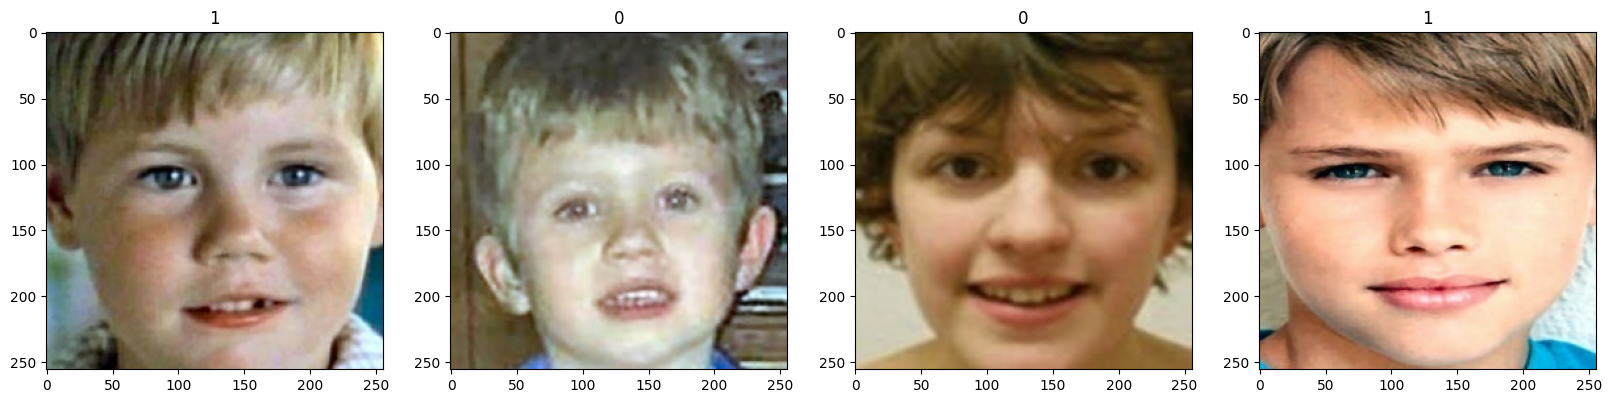

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[2.74509817e-01, 2.86274523e-01, 2.43137255e-01],
          [2.53446698e-01, 2.65211403e-01, 2.22074136e-01],
          [2.14682907e-01, 2.29136035e-01, 1.86894909e-01],
          ...,
          [7.39506707e-02, 1.13166362e-01, 7.78722391e-02],
          [9.83992070e-02, 1.28538609e-01, 9.68749970e-02],
          [1.21568628e-01, 1.41176477e-01, 1.13725491e-01]],
 
         [[2.45833337e-01, 2.57598042e-01, 2.14460790e-01],
          [2.58997768e-01, 2.70762473e-01, 2.27625236e-01],
          [2.61381745e-01, 2.75834858e-01, 2.33593747e-01],
          ...,
          [8.82453471e-02, 1.27461031e-01, 9.21669155e-02],
          [9.56298858e-02, 1.25769287e-01, 9.41056758e-02],
          [8.97058845e-02, 1.09313726e-01, 8.18627477e-02]],
 
         [[2.12254897e-01, 2.32107848e-01, 1.80882350e-01],
          [2.49247000e-01, 2.69099921e-01, 2.17874438e-01],
          [2.86560297e-01, 3.07253361e-01, 2.57540107e-01],
          ...,
          [7.63681456e-02, 1.15583830e-01, 8.0289

In [14]:
batch[0].max()

255.0

In [15]:
len(data)

92

In [16]:
train_size = int(len(data)*.75)+1
val_size = int(len(data)*.15)
test_size = int(len(data)*.1)

In [17]:
train_size+val_size+test_size

92

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create a Sequential model
model = Sequential()

# First layer using Input layer properly
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

# Compile the model with correct parameter name
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 127, 127, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,697,905 (14.11 MB)

 Trainable params: 3,697,265 (14.10 MB)

 Non-trainable params: 640 (2.50 KB)

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
history = model.fit(
    train,
    epochs=50,
    validation_data=val,
    callbacks=[early_stop, reduce_lr])

Epoch 1/50


I0000 00:00:1745274206.221566      96 service.cc:148] XLA service 0x7c8590217540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745274206.222445      96 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745274206.902713      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


10/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6096 - loss: 0.9586

I0000 00:00:1745274211.185433      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.6706 - loss: 0.7584 - val_accuracy: 0.4928 - val_loss: 2.1695 - learning_rate: 0.0010
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7782 - loss: 0.4854 - val_accuracy: 0.5000 - val_loss: 2.9774 - learning_rate: 0.0010
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8168 - loss: 0.4020 - val_accuracy: 0.5120 - val_loss: 1.7376 - learning_rate: 0.0010
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8405 - loss: 0.3507 - val_accuracy: 0.5337 - val_loss: 2.2110 - learning_rate: 0.0010
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.8719 - loss: 0.3222 - val_accuracy: 0.5337 - val_loss: 1.2528 - learning_rate: 0.0010
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8717 - loss: 0.3041 - val_accuracy: 0.5505 - val_loss: 1.0954 - learning_rate: 0.0010
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8970 - loss: 0.2433 - val_accuracy: 0.7

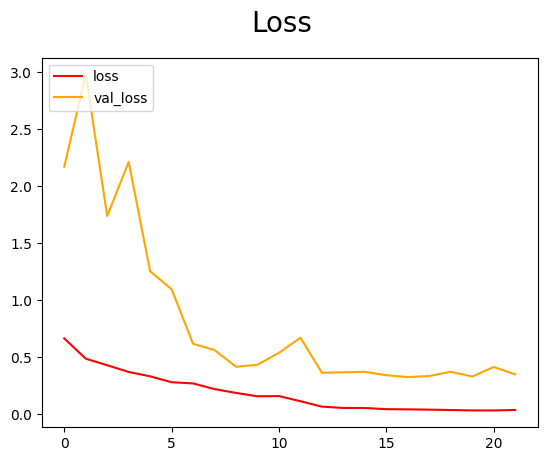

In [24]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

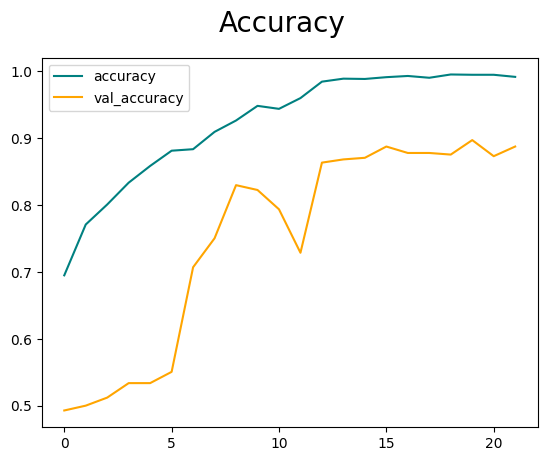

In [25]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    z = model.predict(X)
    pre.update_state(y, z)
    re.update_state(y, z)
    acc.update_state(y, z)
print(pre.result(), re.result(), acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
tf.Tensor(0.8292683, shape=(), dtype=float32) tf.Tensor(0.75, shape=(), dtype=float32) tf.Tensor(0.806338, shape=(), dtype=float32)


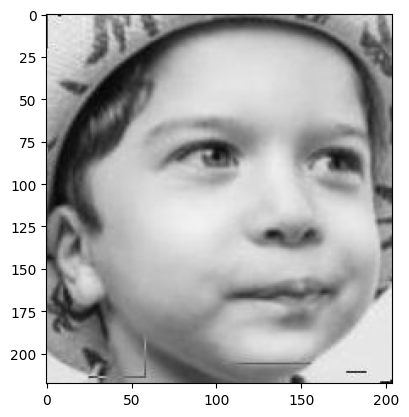

In [31]:
import cv2 as cv2
img = cv2.imread('/kaggle/input/autismdatasetface2classes/AutismDatasetFace/AutismDataset/test/Autistic/Autistic.100.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

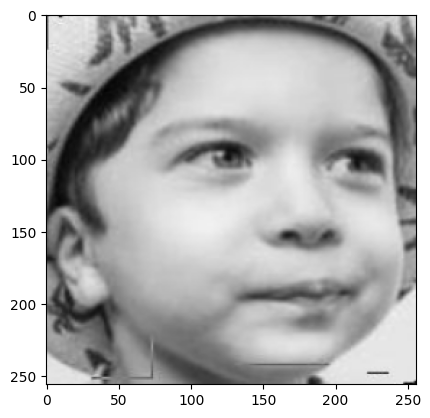

In [32]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
z= model.predict(np.expand_dims(resize/255, 0))
z

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


array([[0.00077037]], dtype=float32)

In [34]:
if z > 0.015:
    print(f'Predicted photo is Not Autistic')
else:
    print(f'Predicted photo is Autistic')

Predicted photo is Autistic


In [36]:
tf.keras.models.save_model(model,'faceAutismModel1.h5')

# 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#
model2 = Sequential()
model2.add(Input(shape=(256, 256, 3)))

model2.add(Conv2D(16, (3, 3), activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())

# 
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.6))  # Dropout for regularization
model2.add(BatchNormalization())

model2.add(Dense(1, activation='sigmoid'))

# Compile the model with correct parameter name
model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ✅ Callbacks
early_stop2 = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history2 = model2.fit(
    train,
    epochs=70,
    validation_data=val,
    callbacks=[early_stop2, reduce_lr2]
)


Epoch 1/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.6610 - loss: 0.7576 - val_accuracy: 0.5192 - val_loss: 1.2260 - learning_rate: 5.0000e-04
Epoch 2/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7648 - loss: 0.5083 - val_accuracy: 0.5072 - val_loss: 1.3143 - learning_rate: 5.0000e-04
Epoch 3/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8234 - loss: 0.4081 - val_accuracy: 0.4856 - val_loss: 2.0077 - learning_rate: 5.0000e-04
Epoch 4/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8279 - loss: 0.3629 - val_accuracy: 0.5168 - val_loss: 1.5034 - learning_rate: 5.0000e-04
Epoch 5/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8823 - loss: 0.2748 - val_accuracy: 0.5216 - val_loss: 1.6667 - learning_rate: 1.0000e-04
Epoch 6/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9144 - loss: 0.2215 - val_accuracy: 0.5481 - val_loss: 1.1010 - learning_rate: 1.0000e-04
Epoch 7/70
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9364

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 
X_test = []
y_test = []

for img_batch, label_batch in test.as_numpy_iterator():
    X_test.extend(img_batch)
    y_test.extend(label_batch)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [42]:
y_pred = (model2.predict(X_test) > 0.5).astype("int32")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


In [43]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

dice_score = (2 * TP) / (2 * TP + FP + FN)
print("Dice Score:", round(dice_score, 4))


Dice Score: 0.8286


In [44]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))


Precision: 0.8112
Recall: 0.8467


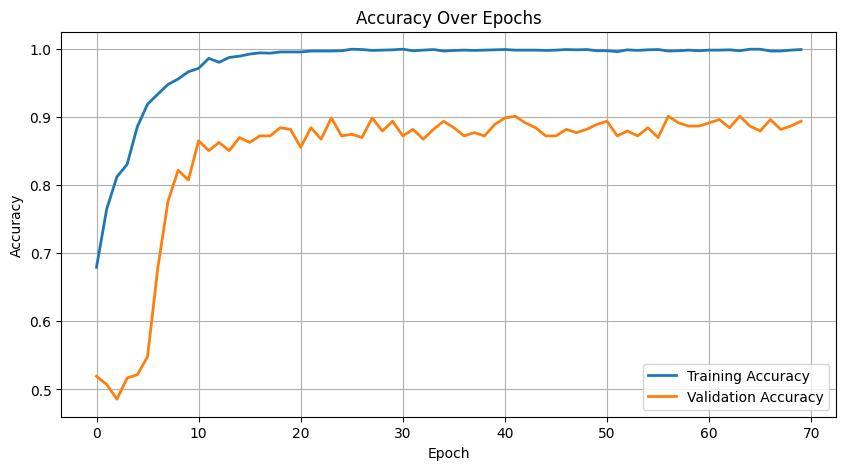

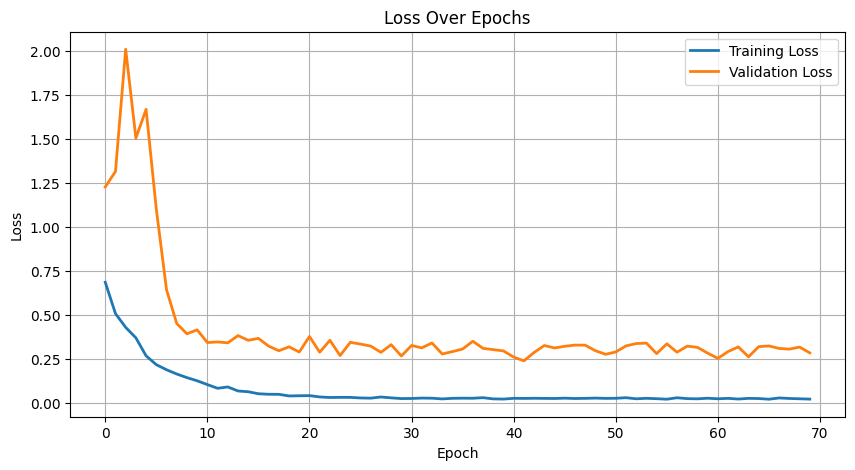

In [ ]:
import matplotlib.pyplot as plt


acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']


plt.figure(figsize=(10,5))
plt.plot(acc, label='Training Accuracy', linewidth=2)
plt.plot(val_acc, label='Validation Accuracy', linewidth=2)
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(loss, label='Training Loss', linewidth=2)
plt.plot(val_loss, label='Validation Loss', linewidth=2)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model2 = Sequential()
model2.add(Input(shape=(256, 256, 3)))
# conv2D filters on image 16 filter, matrix 3*3
model2.add(Conv2D(16, (3, 3), activation='relu'))
# recognize data size
model2.add(MaxPooling2D())
model2.add(BatchNormalization())


model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())

# 2D to 1D
model2.add(Flatten())

#NN
model2.add(Dense(256, activation='relu'))
# reduce overfitting
model2.add(Dropout(0.6))  # Dropout 
# after each layer make twazn
model2.add(BatchNormalization())

model2.add(Dense(1, activation='sigmoid'))

# Compile learning rate
model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks 
early_stop2 = EarlyStopping(monitor='val_loss', patience=35, restore_best_weights=True)
reduce_lr2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history2 = model2.fit(
    train,
    epochs=35,
    validation_data=val,
    callbacks=[early_stop2, reduce_lr2]
)


Epoch 1/35
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.6800 - loss: 0.6999 - val_accuracy: 0.5072 - val_loss: 1.0609 - learning_rate: 5.0000e-04
Epoch 2/35
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.7892 - loss: 0.4698 - val_accuracy: 0.5168 - val_loss: 1.6611 - learning_rate: 5.0000e-04
Epoch 3/35
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8113 - loss: 0.4054 - val_accuracy: 0.5192 - val_loss: 1.8784 - learning_rate: 5.0000e-04
Epoch 4/35
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8370 - loss: 0.3767 - val_accuracy: 0.4928 - val_loss: 2.2394 - learning_rate: 5.0000e-04
Epoch 5/35
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8873 - loss: 0.2648 - val_accuracy: 0.5096 - val_loss: 1.7760 - learning_rate: 1.0000e-04
Epoch 6/35
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9191 - loss: 0.2197 - val_accuracy: 0.5144 - val_loss: 1.4125 - learning_rate: 1.0000e-04
Epoch 7/35
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9381

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix


X_test = []
y_test = []

for img_batch, label_batch in test.as_numpy_iterator():
    X_test.extend(img_batch)
    y_test.extend(label_batch)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [55]:
y_pred = (model2.predict(X_test) > 0.5).astype("int32")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [56]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

dice_score = (2 * TP) / (2 * TP + FP + FN)
print("Dice Score:", round(dice_score, 4))


Dice Score: 0.8185


In [57]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))


Precision: 0.8217
Recall: 0.8154


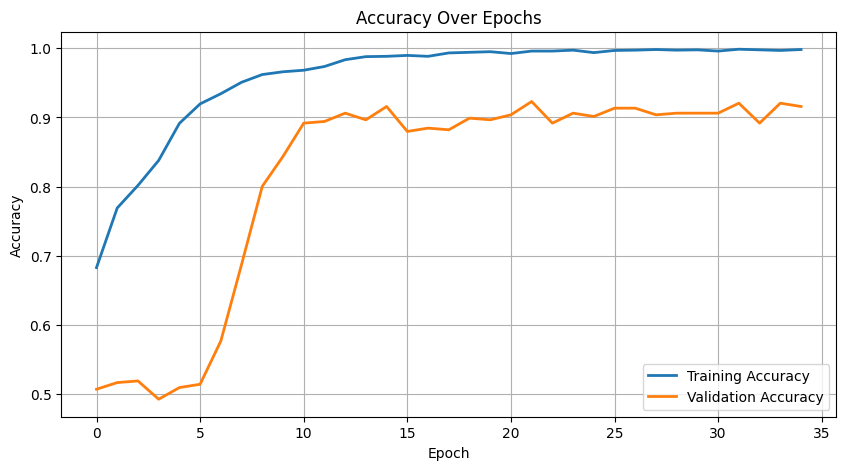

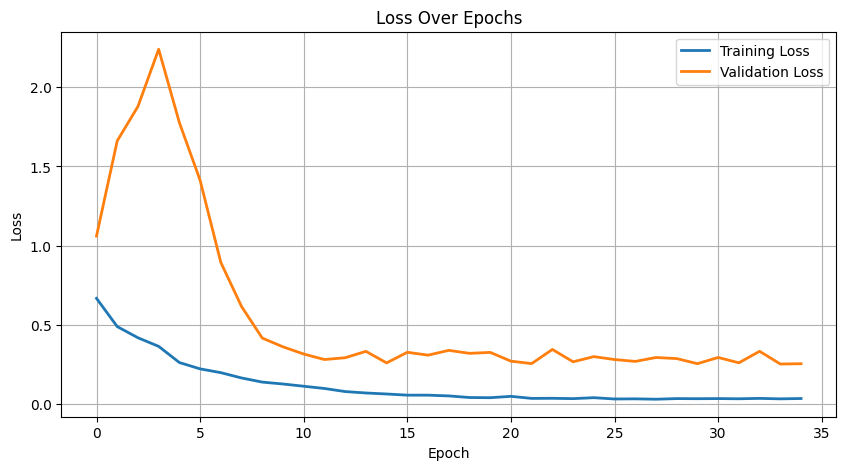

In [ ]:
import matplotlib.pyplot as plt


acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']


plt.figure(figsize=(10,5))
plt.plot(acc, label='Training Accuracy', linewidth=2)
plt.plot(val_acc, label='Validation Accuracy', linewidth=2)
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(loss, label='Training Loss', linewidth=2)
plt.plot(val_loss, label='Validation Loss', linewidth=2)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# ✅ Compile
model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ✅ Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history_mobilenet = model.fit(
    train,
    epochs=35,
    validation_data=val,
    callbacks=[early_stop, reduce_lr]
)


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

# load model 
model = load_model('/kaggle/working/autism_face_model.h5')

# paths to test directories
autistic_dir = '/kaggle/input/autismdatasetface2classes/AutismDatasetFace/AutismDataset/test/Autistic'
non_autistic_dir = '/kaggle/input/autismdatasetface2classes/AutismDatasetFace/AutismDataset/test/Non_Autistic'

def load_images_from_folder(folder, label):
    data = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = image.load_img(img_path, target_size=(256, 256))
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            data.append((img_array, label))
        except:
            print(f" {filename}")
    return data

autistic_data = load_images_from_folder(autistic_dir, 0)
non_autistic_data = load_images_from_folder(non_autistic_dir, 1)


all_data = autistic_data + non_autistic_data
X = np.array([x[0] for x in all_data])
y_true = np.array([x[1] for x in all_data])

y_probs = model.predict(X)
y_pred = (y_probs > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Non-Autistic", "Autistic"]))
